In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
x =df.drop('label',axis=1)

In [5]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y=df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
df=df.dropna()

In [10]:
df.shape

(18285, 5)

In [11]:
messages=df.copy()

In [12]:
messages.head(30)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
messages.reset_index(inplace=True)

messages.head(10)

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('English')]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 6000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape


(18285, 6000)

In [16]:
y =messages['label']

In [17]:
y.shape

(18285,)

In [18]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 0)
cv.get_feature_names()[:20]

['aaron',
 'ab',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'aboard',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'abstain un',
 'abstain un vote',
 'absurd',
 'abu',
 'abus']

In [44]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics                                                 
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## svm

In [45]:
from sklearn.svm import SVC

In [46]:
m=SVC(kernel='linear',random_state=0)
m.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [47]:
Accuracy=m.score(X_test,y_test)
print('Accracy:{}'.format(Accuracy*100))

Accracy:92.33293229793284


Precision: 0.896
Recall: 0.931
F1_score: 0.913
Confusion matrix, without normalization


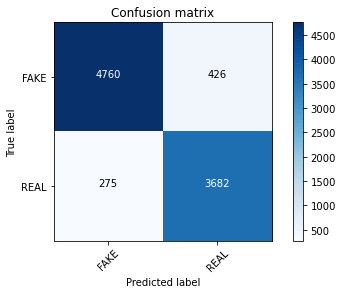

In [48]:
y_pred=m.predict(X_test)
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test,y_pred))
from sklearn.metrics import f1_score
print('F1_score: %.3f' % f1_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression


Accuracy:92.87979875314448
Precision: 0.880
Recall: 0.967
F1_score: 0.922
Confusion matrix, without normalization


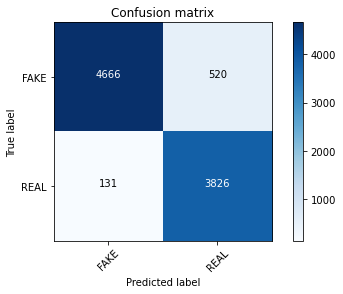

In [50]:
m1=LogisticRegression()
m1.fit(X_train,y_train)
Accuracy=m1.score(X_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))
y_pred=m1.predict(X_test)
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test,y_pred))
from sklearn.metrics import f1_score
print('F1_score: %.3f' % f1_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Decision Tree

Accuracy:91.55638193153231
Precision: 0.891
Recall: 0.917
F1_score: 0.904
Confusion matrix, without normalization


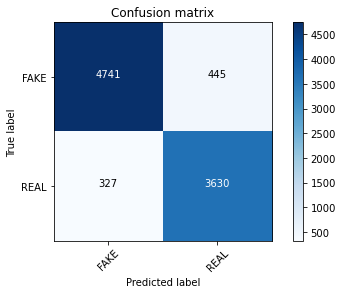

In [51]:
from sklearn.tree import DecisionTreeClassifier
m3=DecisionTreeClassifier()
m3.fit(X_train,y_train)
Accuracy=m3.score(X_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))
y_pred=m3.predict(X_test)
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test,y_pred))
from sklearn.metrics import f1_score
print('F1_score: %.3f' % f1_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#  RandomForest

Accuracy:92.91261074045718
Precision: 0.879
Recall: 0.969
F1_score: 0.922
Confusion matrix, without normalization


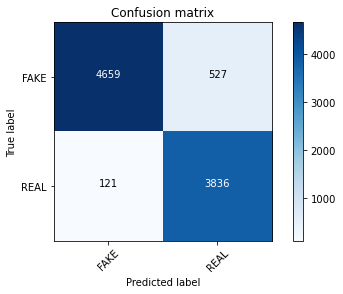

In [52]:
from sklearn.ensemble import RandomForestClassifier
m4=RandomForestClassifier()
m4.fit(X_train,y_train)
Accuracy=m4.score(X_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))
y_pred=m4.predict(X_test)
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test,y_pred))
from sklearn.metrics import f1_score
print('F1_score: %.3f' % f1_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


#  PAC

Accuracy: 92.00481242480586
Confusion matrix, without normalization


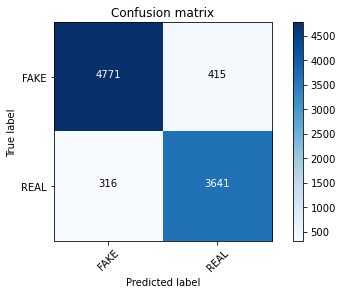

In [53]:
from sklearn.linear_model import PassiveAggressiveClassifier
m5=PassiveAggressiveClassifier()
m5.fit(X_train,y_train)
Accuracy=m5.score(X_test,y_test)
print('Accuracy: {}'.format(Accuracy*100))
y_pred=m5.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [54]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test,y_pred))
from sklearn.metrics import f1_score
print('F1_score: %.3f' % f1_score(y_test,y_pred))

Precision: 0.898
Recall: 0.920
F1_score: 0.909
